# Was ist Gradient Descent und wie funktioniert es?

## Eine Coding Anleitung

(dieser Beitrag basiert lose auf dem von fastai zur Verfügung gestellten [fastbook](https://github.com/fastai/fastbook))

Dieser Blog Post ist nicht dafür gedacht aufzuzeigen, wie die mathematische Berechnung hinter Gradient Descent funktioniert. Denn zum Glück gibt es genau dafür Computer, die das Ganze wahrscheinlich millionenfach schneller berechnen können als wir. Ich will eine intuitive Erklärung für Gradient Descent liefern, wofür wir Gradient Descent überhaupt brauchen und wie wir mit simplen Python Code unseren eigenen auf Gradient Descent beruhenden Algorithmus bauen können.

Ich erinnere mich, dass ich zu Schulzeiten (und mehr als Abi-Mathe wird für diesen Post wahrhaftig nicht gebraucht) die Ableitungsregeln gelernt und auf Funktionen angewandt habe, aber wirklich Sinn und Zweck habe ich in dem Ganzen nie gesehen. Im besten Fall hat sich die Lehrerin einen an den Haaren herbeigezogenen Fall ausgedacht, um nicht einfach stumpf die Funktion zu liefern, die abgeleitet werden soll. Ich hoffe nach diesem Blog wird klarer, weswegen Ableitungen bzw. die dazugehörigen Gradienten doch eine ziemlich coole und nützliche Sache sind. 

Zunächst einmal möchte ich zeigen, was Gradient Descent kann:

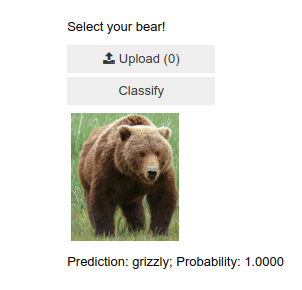

Ein Algorithmus, der erkennen kann, was für ein Bär auf einem gegebenem Bild zu sehen ist? Was zur Hölle hat das mit Gradient Descent zu tun? Wenn du es bis zum Ende des Posts aushältst, wirst du das hoffentlich verstehen.

Gradient Descent hilft Computern dabei zu lernen. Das Ganze sollten wir uns vielleicht in einem Schaubild einmal näher anschauen:

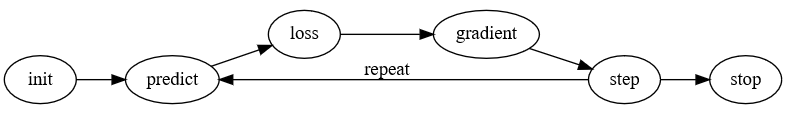

Die Idee ist dabei wie folgt: Wir haben ein Modell, welches anhand von Bildern erkennen soll, welche Art von Bär hier zu sehen ist. Nachdem wir genügend Bilder von verschiedenen Bären gesammelt haben, fangen wir an unser Modell zu fragen, was es glaubt für eine Art von Bären zu sehen (predict). Wir können uns nun Metriken überlegen, an denen wir erkennen können, wie gut diese Vorhersage unseres Modells ist, zum Beispiel wie häufig das Modell die richtige Bärenart vorhergesagt hat und wie häufig es falsch lag. Wir können daraus einen sogenannten Loss berechnen, was nichts anderes ist als das, was die Lehrer uns immer als Funktion beschrieben haben. Wir haben also eine Funktion die uns angibt, wie gut/schlecht unser Modell Bärenarten vorhersagen kann. Diese Funktion kann zum Beispiel eine simple quadratische Funktion sein, sie kann aber theoretisch jede nur erdenkliche Form annehmen. 

Wir wollen unseren Loss minimieren, sprich unsere Funktion soll so gut wie es nur kann die Funktion lernen, wie es möglichst gut Bärenarten voneinander unterscheiden kann. Lass uns eine Sekunde darüber nachdenken. Wir benutzen eine Loss-Funktion, damit wir unserem Modell Feedback geben, wie gut/schlecht es die bisherige Aufgabe gelöst hat. Mithilfe dieser Loss-Funktion lernt unser Modell, die verschiedenen Bärenarten besser zu unterscheiden. Doch wie "lernt" das Modell? Hier kommt Gradient Descent ins Spiel.

Der Gradient, also die Ableitung, gibt uns an, um wie viel die Funktion größer wird, wenn wir (optisch gesprochen) einen kleinen Schritt nach rechts bzw. einen kleinen Schritt nach links gehen von dem Punkt, an dem wir uns gerade befinden. Dies ist die Steigung von dem Punkt, an welchem wir uns gerade befinden. Doch was bringt uns das?

Ich hoffe, du hast einen Moment darüber nachgedacht. Was wir wollen, ist möglichst gut die Bärenarten voneinander zu unterscheiden. Dies steuern wir über unsere Loss-Funktion. Und je geringer unsere Loss-Funktion, desto besser sind wir im Vorhersagen, was für eine Bärenart wir hier gerade haben. Durch den Gradienten wissen wir, in welche Richtung wir uns bewegen müssen, um unsere Loss-Funktion kleiner zu machen.

Noch mag das Ganze recht abstrakt klingen, schon in Kürze folgt hier das Beispiel in Python. Ich will das Ganze aber noch einmal zusammenfassen. Wir wollen etwas optimieren, zum Beispiel möglichst genau die Bärenart vorhersagen. Um diese Funktion zu optimieren, brauchen wir die Loss-Funktion, die uns angibt, wie gut/schlecht unser Modell/unsere Zielfunktion performt. Diese Funktionen können jegliche erdenkliche Formen annehmen. Dem Gradienten ist dies jedoch egal. Der Gradient kann uns zu jedem Ort, an welchem wir uns in der Funktion befinden sagen, was mit unser Loss-Funktion passiert, wenn wir uns ein kleines Stück in eine beliebeige Richtung bewegen. Dies nutzen wir als Feedback, um die Parameter der Zielfunktion so anzupassen, dass die Loss-Funktion kleiner wird, wir also besser die Bärenarten voneinander unterscheiden können.

Dies sind die Schritte, die in dem Schaubild erklärt sind: wir initialisieren die Werte unserer Zielfunktion (anfangs zufällig, weil wir nicht wissen, wie die richtige Funktion aussieht), wir lassen unser Modell Vorhersagen treffen, berechnen daraufhin den Loss und die dazugehörigen Gradienten, um dann durch die Gradienten die Parameter des Modells anzupassen. Diesen Prozess wiederholen wir solange, bis wir mit dem Endergebnis zufrieden sind .Dies sollte auf einem sogenannten Validierungs-Set festgelegt werden, also auf Bildern von Bären, die unser Modell im Trainingsloop nicht sieht. Vielleicht wäre es hier angebracht einmal darüber nachzudenken, warum wir nicht einfach den Trainingsloop solange wiederholen, bis wir alle Bärenarten durch Gradient Descent korrekt vorhersagen können (Stichwort: Overfitting).

Genug geredet, jetzt wollen wir das Ganze auch in Code sehen!

# Code Beispiel
 Wir wollen mit Hilfe des oben beschriebenen Prozesses eine Funktion finden, die möglichst genau den Verlauf folgender Funktion beschrieben kann:

In [713]:
import torch
import matplotlib.pyplot as plt

In [714]:
x = torch.arange(-5,20).float(); x

tensor([-5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,
         9., 10., 11., 12., 13., 14., 15., 16., 17., 18., 19.])

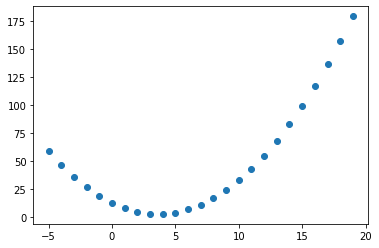

In [715]:
y = 0.75*(x-4)**2 + 0.5*x + 1
plt.scatter(x,y);

Was wir wollen ist die Parameter dieser Funktion zu schätzen. Vom ansehen der Daten können wir bereits auf die funktionale Form schließen - ein Polynom 3ten Grades. Was wir an diesem Beispiel schon erkennen können ist, dass die angenommene Zielfunktion eine große Rolle spielt. Hätten wir von den Daten auf eine quadratische Funktion geschlossen, würden wir die "wahre" Form der Funktion nie richtig bestimmen können. Deep Learning überkommt dieses "Problem", indem es jede nur erdenkliche Funktion annehmen kann (dazu mehr in einem späteren Post).



In [716]:
def f(x, params):
    a,b,c,d = params
    return a*(x-b)**2 + (c*x) + d

Jetzt benötigen wir noch unsere Loss-Funktion (und ich hoffe hier wird klar, wie Loss-Funktion und Zielfunktion miteinander "kommunuzieren):

In [717]:
def mse(preds, targets): return ((preds-targets)**2).mean()

preds sind die Vorhersagen des Modells, targets die "wahren" Werte aus unseren Daten. Was die Loss-Funktion ausspuckt ist der sogenannte Root Mean Squared Error.

Jetzt folgen wir den beschriebenen Steps aus dem Schaubild: wir initiieren zufällig unsere Parameter der Zielfunktion (a,b,c und d)

In [718]:
params = torch.randn(4).requires_grad_()
params

tensor([-1.3573, -0.9368, -1.0199,  1.2579], requires_grad=True)

Wir starten unsere Vorhersagen:

In [719]:
preds = f(x, params)

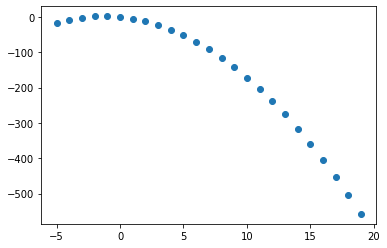

In [720]:
plt.scatter(x,preds.detach().numpy())

Wie gut sehen unsere Vorhersagen aus?

In [721]:
def show_preds(preds, ax=None):
    if ax is None: ax=plt.subplots()[1]
    ax.scatter(x, y)
    ax.scatter(x, preds.detach().numpy(), color='red')
    ax.set_ylim(-10,100)
    ax.set_xlim(-5,20)

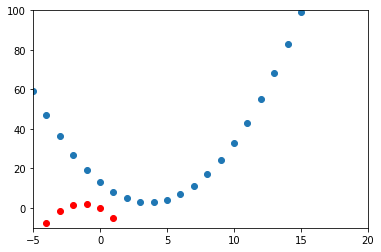

In [722]:
show_preds(preds)

Wow! Ziemlich miserabel. Wie miserabel zeigt uns unser loss.

In [723]:
loss = mse(preds, y)
loss

tensor(94110.5078, grad_fn=<MeanBackward0>)

Auf geht's Gradient! Zeig uns, wie wir unsere Parameter updaten müssen, damit der Loss kleiner wird.

In [724]:
loss.backward()
params.grad

tensor([-103388.2812,  -16927.5586,   -5837.9043,    -424.4346])

Dann lass uns unsere Paramter anpassen (wir multiplizieren den Gradienten mit der sogenannten Learning Rate, dazu in einem weiteren Blog Posts mehr).

In [725]:
lr = 1e-5
params.data -= lr * params.grad.data
params.grad = None
params

tensor([-0.3235, -0.7676, -0.9615,  1.2621], requires_grad=True)

Ist unser Loss geringer geworden?

In [726]:
preds = f(x,params)
mse(preds, y)

tensor(17231.4336, grad_fn=<MeanBackward0>)

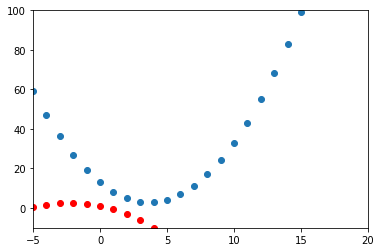

In [727]:
show_preds(preds)

Zum Glück ja.

Wir wollen die steps wiederholen, sodass wir langsam und mithilfe von Gradient Descent unsere Zielfunktion finden.

In [728]:
def apply_step(params, prn=True):
    preds = f(x, params)
    loss = mse(preds, y)
    loss.backward()
    params.data -= lr * params.grad.data
    params.grad = None
    if prn: print(loss.item())
    return preds

In [730]:
lr=1e-5
for i in range(20): apply_step(params)

273.7003173828125
272.6025695800781
272.28729248046875
272.1312255859375
272.0077209472656
271.890625
271.775146484375
271.6598205566406
271.5444030761719
271.42938232421875
271.3142395019531
271.1991271972656
271.08404541015625
270.96893310546875
270.85382080078125
270.73876953125
270.6238708496094
270.5089111328125
270.3939514160156
270.279052734375


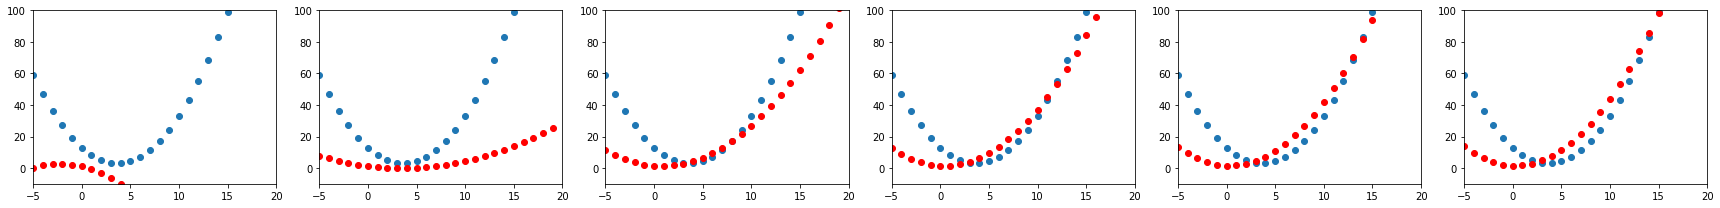

In [729]:
_,axs = plt.subplots(1,6,figsize=(24,3))
for ax in axs: show_preds(apply_step(params, False), ax)
plt.tight_layout()

Wie man sieht, passt sich die rote Kurve, also unsere Vorhersagen, immer mehr der wahren Kurve an. Alles aufgrund von Gradient Descent! Und genau diese Technik und diese Schritte, die hier in diesem Blog Post aufgezeigt wurden, sind auch die Schritte, die dabei helfen, Neuronale Netze zu trainieren. Die dann wiederum Bären auseinander halten können. 


Ich hoffe, durch diesen Post ist die Idee hinter Gradient Descent ein wenig greifbarer geworden und der Sinn und Zweck von Ableitungen könnte von einer anderen Seite vielleicht ein wenig verständlicher betrachtet werden.

Bleibt dran für die nächsten Posts!

Euer Lasse